# Hard Margin Support Vector Machines

From scratch implementation of a hard margin support vector machine in the primal and dual form for the Iris Flower Data Set.

In [1]:
__author__ = "Patrick Tu"

In [2]:
#----------------------- IMPORTS -------------------------
import csv
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
%matplotlib inline 
import random
from mpl_toolkits.mplot3d import Axes3D

## 1. Data Set

In [4]:
#----------------------- DATA IMPORT -------------------------

# Import Data Set
df = pd.read_csv ('bezdekIris.csv', header=None)
df.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width', 'Class']

# Just use two attribrutes, petal length and sepal width, from two classes
df_2 = df.drop(["Sepal_length"],axis=1) 
#print(df_2.class)

# Column with 1s added for the bias term
df_2['Ones']=1

#Assign Labels for each class 
df_iv = df_2[df_2.Class == 'Iris-versicolor']
df_iv['Label']=-1

df_is = df_2[df_2.Class == 'Iris-setosa']
df_is['Label']=1

#Concatenate to one data frame as training set for regressions
df_conc = pd.concat([df_is,df_iv])
df_conc

/Users/Patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Patrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sepal_width,Petal_length,Petal_width,Class,Ones,Label
0,3.5,1.4,0.2,Iris-setosa,1,1
1,3.0,1.4,0.2,Iris-setosa,1,1
2,3.2,1.3,0.2,Iris-setosa,1,1
3,3.1,1.5,0.2,Iris-setosa,1,1
4,3.6,1.4,0.2,Iris-setosa,1,1
5,3.9,1.7,0.4,Iris-setosa,1,1
6,3.4,1.4,0.3,Iris-setosa,1,1
7,3.4,1.5,0.2,Iris-setosa,1,1
8,2.9,1.4,0.2,Iris-setosa,1,1
9,3.1,1.5,0.1,Iris-setosa,1,1


## 2. 3D Scatter Plot

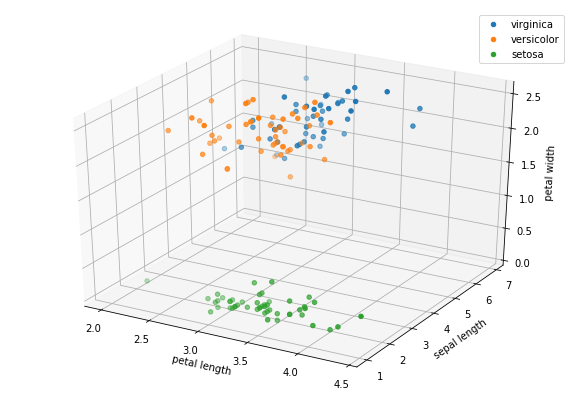

In [5]:
#----------------------- DATA VISUALIZATION -------------------------
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-virginica"],df_2.Petal_length[df_2.Class == "Iris-virginica"], df_2.Petal_width[df_2.Class == "Iris-virginica"],"bo" , label="virginica")
ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-versicolor"], df_2.Petal_length[df_2.Class == "Iris-versicolor"],df_2.Petal_width[df_2.Class == "Iris-virginica"] ,"go", label="versicolor" )
ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-setosa"], df_2.Petal_length[df_2.Class == "Iris-setosa"], df_2.Petal_width[df_2.Class == "Iris-setosa"],"ro" , label="setosa")
ax.set_ylabel("sepal length")
ax.set_xlabel("petal length")
ax.set_zlabel("petal width")
ax.legend()

## 3. The primal problem

In [254]:
# Get data set 
X = df_conc.drop(["Class","Label"], axis=1)
X_2d = df_conc.drop(["Class","Label","Petal_width"], axis=1)
Y = df_conc["Label"]

In [255]:
#-------------------CONVEX OPTIMIZATION ----------------------

# Define objective function
def function(w):
    return np.linalg.norm(w[:3])

#Define Constraints
def constraint(w):
    return (np.asarray(Y)*(np.dot(X,w)) ) - np.ones(len(Y))

const =  ({'type': 'ineq', 'fun': constraint })

#------------------------------------------
#WHY DOES THE FOLLOWING NOT WORK ?!??!?!?!?!
#------------------------------------------
#c = []
#for i in range(len(X)):
    #const +=({'type': 'ineq', 'fun': lambda w:  (Y[i]*(np.dot(X.loc[i],w)))-1 },)
    #c.append( {'type': 'ineq', 'fun': lambda w:  (Y.loc[i]*(np.dot(X.loc[i],w)))-1 })    
#const = tuple(const)
#const = ( {'type': 'ineq', 'fun': lambda w:  (Y.loc[i]*(np.dot(X.loc[i],w)))-1 } for i in range (len(X)))

# Minimize Optimization Problem
x0 = np.zeros(4)
res = scipy.optimize.minimize(function,x0,method='SLSQP', constraints=const)
w = res.x

print(res)
print("Weight vector =", np.asarray(w))

     fun: 1.2247448721337981
     jac: array([ 0.40824829, -0.81649658, -0.40824829,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 0.5, -1. , -0.5,  1.3])
Weight vector = [ 0.5 -1.  -0.5  1.3]


In [256]:
#Verify Classification of training set
def predict(x):
    return ((np.dot(X,w)))

#predict(X)

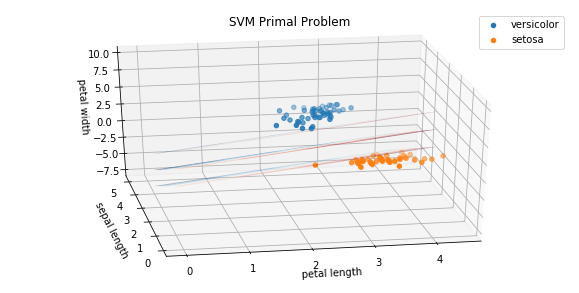

In [243]:
#-------------------VISUALIZATION ----------------------

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal vector
normal = w[:3]

#Point on the Separating hyperplane and the two hyperplanes defining the margin h1 and h2
point = -( w[3] /np.linalg.norm(normal)) * normal 
point_h1 = - np.abs(1-w[3])/np.linalg.norm(normal) *normal
point_h2 = - np.abs(-1-w[3])/np.linalg.norm(normal) *normal

#Calculate d 
d = -point.dot(normal)
d_h1 = -point_h1.dot(normal)
d_h2 = -point_h2.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z values
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
z_h1 = (-normal[0] * xx - normal[1] * yy - d_h1) * 1. /normal[2]
z_h2 = (-normal[0] * xx - normal[1] * yy - d_h2) * 1. /normal[2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,z, cmap=plt.cm.RdBu_r, alpha=0.5, linewidth=0)
ax.plot_surface(xx,yy,z_h1, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)
ax.plot_surface(xx,yy,z_h2, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)

ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-versicolor"], df_2.Petal_length[df_2.Class == "Iris-versicolor"],df_2.Petal_width[df_2.Class == "Iris-virginica"] ,"go", label="versicolor" )
ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-setosa"], df_2.Petal_length[df_2.Class == "Iris-setosa"], df_2.Petal_width[df_2.Class == "Iris-setosa"],"ro" , label="setosa")
ax.set_ylabel("sepal length")
ax.set_xlabel("petal length")
ax.set_zlabel("petal width")
ax.set_title("SVM Primal Problem")
ax.legend()
ax.view_init(30, 260)

## 4. The Dual Representation

In [248]:
#-------------------CONVEX OPTIMIZATION ----------------------

def gram_matrix(X):
    '''
    Compute Gramian Matrix / inner product space where K[i,j] = <X_i , x_j>
    X : Data Frame with n feautures and d features
    '''
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range (n_samples):
        for j in range(n_samples):
            K[i, j] = np.dot(X.loc[i], X.loc[j])
    return K 

#Initialize Gram Matrix and make globally available so that it doesn't
#need to be recomputed in every optimization step 
K = gram_matrix(X)

#Objective Function
def function(alpha, Y=Y, X=X, K=K):
    '''
    Parameters:
    alpha: Vector of Langrangian Multiplier (to be optimized in the Dual Problem)
    Y (globally defined): Vector of Target Labels
    X (globally defined): (m,d) Matrix of featurs with m training samples and d features per data point
    K (globally defined): Gramian Matrix of feature space X
    
    '''
    # As we run a minimzation problem take negative objective function
    return -(np.sum(alpha) - 0.5 *np.sum ( np.outer(Y,Y)*np.outer(alpha,alpha) * K ))


#Define Constraints
def constraint1(alpha):
    return np.dot(alpha,Y)

def constraint2(alpha):
    #Non-Negativity Constraint
    return alpha

const =  ({'type': 'eq', 'fun': constraint1 }, {'type': 'ineq', 'fun': constraint2 })

    
# Minimize Optimization Problem
x0 = np.zeros(len(X))
res = scipy.optimize.minimize(function,x0,method='SLSQP', constraints=const)
alpha = res.x

print(res)

     fun: -0.7499996881092645
     jac: array([-0.75122976, -1.00120902, -0.80113876, -1.05129168, -0.70123393,
       -0.95146709, -0.85121816, -0.90130413, -1.05120485, -1.00129912,
       -0.75131658, -1.00138264, -0.95121649, -0.6509809 , -0.30109344,
       -0.50133072, -0.551153  , -0.80122234, -0.95147036, -0.75131329,
       -1.10146122, -0.85130176, -0.30091984, -1.30143479, -1.30161817,
       -1.20136606, -1.1013678 , -0.85130826, -0.80122563, -1.10137434,
       -1.1513702 , -1.00128929, -0.50134059, -0.40125877, -1.05129169,
       -0.70106025, -0.6511513 , -0.65124133, -0.90113048, -0.90130415,
       -0.70114382, -1.30109397, -0.80113877, -1.15135708, -1.20161994,
       -1.05120158, -0.80139925, -0.90121732, -0.75131655, -0.85122146,
        2.80371971,  2.65355526,  3.10386512,  2.50313995,  2.9536171 ,
        2.75355341,  2.85370903,  1.60261679,  2.8036361 ,  2.2530707 ,
        2.00275715,  2.45331128,  2.40315811,  2.95370722,  1.80285087,
        2.55347994,  2.7

In [237]:
#-------------------PARAMETER COMPUTATION ----------------------

# Get the indexes of non-zero langrange multipliers to get Support Vectors
threshold = 1e-10

sv = alpha > threshold
ind = np.arange(len(alpha))[sv]

#print(alpha[alpha>threshold])

#Compute weight vector
temp_w = np.zeros(4)
b=0
for i in ind:
    temp_w += alpha[i]*Y[i]*X.loc[i]

print("Weight Vector: ",np.asarray(temp_w) )
    
#The included Bias (last dimension of weight vector) seems to be off and different 
# in every optimization trial => altrnative way to compute b via a KKT Constraint

b = (1/ Y[ind[0]]) - temp_w[0:3].dot(X.loc[ind[0]][0:3])
temp_w[-1]=b

print("Weight Vector inlcuding corrected Bias: ",np.asarray(temp_w) )

Weight Vector:  [  4.99958352e-01  -1.00078505e+00  -4.99925904e-01  -2.77555756e-15]
Weight Vector inlcuding corrected Bias:  [ 0.49995835 -1.00078505 -0.4999259   1.30143497]


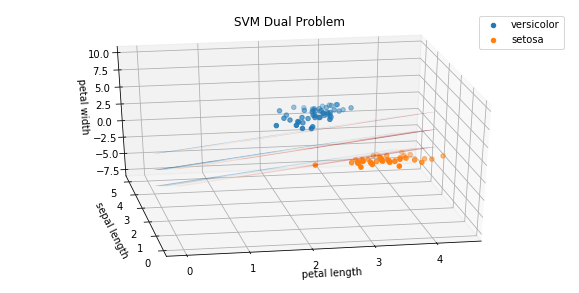

In [242]:
#-------------------VISUALIZATION ----------------------

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal.
normal = temp_w[:3]

#Point on the Separating hyperplane and the two hyperplanes defining the margin h1 and h2
point = -( temp_w[3] /np.linalg.norm(normal)) * normal 
point_h1 = - np.abs(1-temp_w[3])/np.linalg.norm(normal) *normal
point_h2 = - np.abs(-1-temp_w[3])/np.linalg.norm(normal) *normal

#Calculate d 
d = -point.dot(normal)
d_h1 = -point_h1.dot(normal)
d_h2 = -point_h2.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z values
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
z_h1 = (-normal[0] * xx - normal[1] * yy - d_h1) * 1. /normal[2]
z_h2 = (-normal[0] * xx - normal[1] * yy - d_h2) * 1. /normal[2]


#for angle in range(0,360,30):
    # plot the surface
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,z, cmap=plt.cm.RdBu_r, alpha=0.5, linewidth=0)
ax.plot_surface(xx,yy,z_h1, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)
ax.plot_surface(xx,yy,z_h2, cmap=plt.cm.RdBu_r, alpha=0.3, linewidth=0)

ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-versicolor"], df_2.Petal_length[df_2.Class == "Iris-versicolor"],df_2.Petal_width[df_2.Class == "Iris-virginica"] ,"go", label="versicolor" )
ax.scatter(df_2.Sepal_width[df_2.Class == "Iris-setosa"], df_2.Petal_length[df_2.Class == "Iris-setosa"], df_2.Petal_width[df_2.Class == "Iris-setosa"],"ro" , label="setosa")
ax.set_ylabel("sepal length")
ax.set_xlabel("petal length")
ax.set_zlabel("petal width")
ax.set_title("SVM Dual Problem")
ax.legend()
ax.view_init(30, 260)